In [12]:
import os
import sys
import cv2
import random
import numpy as np
import pandas as pd
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt

In [46]:
def get_bbox(path,IMG_SIZE=416): ### Default is set to SSDD image dimension
    temp=[]
    _,file= os.path.split(path)
    with open(path) as f:
        for i in f:
            box=i.split(' ')
            x = float(box[1]) *IMG_SIZE
            y = float(box[2]) *IMG_SIZE
            w = float(box[3]) *IMG_SIZE
            h = float(box[4]) *IMG_SIZE
            temp.append([file,x,y,w,h])
    return temp

def distribution_of_aspect_ratio(PATH,IMG_SIZE,plot_name):
    cols=['ID','X','Y','W','H']
    df=pd.DataFrame(columns=cols)
    for file in os.listdir(PATH):
        file_path= os.path.join(PATH, file)
        boxes= get_bbox(file_path, IMG_SIZE)
        temp_df=pd.DataFrame(boxes,columns= cols )
        df = pd.concat([df, temp_df], ignore_index=True)
    df['aspect_ratio']= (df['W']/df['H']).round(4)
    plt.figure(figsize=(6, 6))
    plt.hist(df['aspect_ratio'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of vessel size of '+plot_name)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency of ships')
    plt.grid(False)
    #plt.savefig(plot_name+'.png')
    plt.show()
    return df

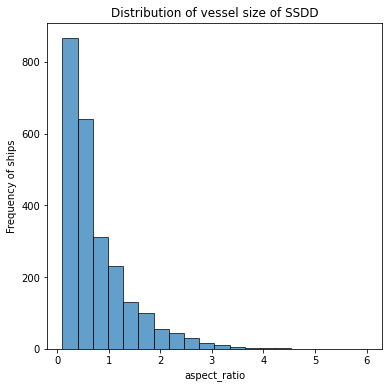

In [5]:
temp=distribution_of_aspect_ratio(os.path.normpath('SSDD/labels/'), 416, 'SSDD')

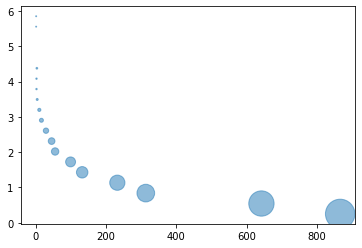

In [11]:
counts, bin_edges = np.histogram(temp['aspect_ratio'].to_list(), bins=20)
bin_centers = 0.5 * (bin_edges[1:]+ bin_edges[:-1])

bubble_size = counts * 1

plt.scatter(counts, bin_centers, s=bubble_size, alpha=0.5 )

plt.show()

In [14]:
temp[temp['aspect_ratio']>3]

,ID,X,Y,W,H,aspect_ratio
15,000014.txt,137.5,207.5,157.0,35.0,4.4857
16,000015.txt,316.0,84.5,168.0,53.0,3.1698
25,000020.txt,206.5,224.0,201.0,48.0,4.1875
26,000021.txt,235.0,253.0,148.0,40.0,3.7000
28,000023.txt,271.5,178.0,177.0,32.0,5.5312
29,000024.txt,284.0,207.5,174.0,41.0,4.2439
30,000025.txt,202.0,184.5,138.0,23.0,6.0000
31,000026.txt,177.0,179.0,134.0,38.0,3.5263
40,000034.txt,246.5,209.5,177.0,55.0,3.2182
41,000035.txt,162.5,186.5,199.0,61.0,3.2623


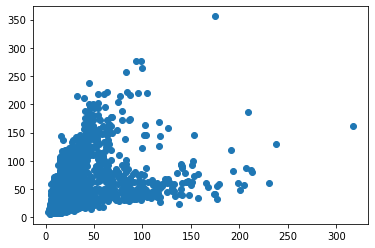

In [16]:
plt.scatter(temp['W'],temp['H'])

##### Making batch of training samples

In [4]:
directory_path='SSDD/images'
all_files = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

In [14]:
random.seed(42)
selected_images = random.sample(all_files, min(len(all_files), 50))
print(selected_images)

['000232.jpg', '000052.jpg', '000572.jpg', '000510.jpg', '000465.jpg', '000290.jpg', '000212.jpg', '001143.jpg', '000181.jpg', '000886.jpg', '000066.jpg', '000062.jpg', '000194.jpg', '000454.jpg', '000484.jpg', '001056.jpg', '000055.jpg', '000414.jpg', '000881.jpg', '000459.jpg', '000941.jpg', '000578.jpg', '000014.jpg', '000331.jpg', '000887.jpg', '000718.jpg', '000323.jpg', '000447.jpg', '000711.jpg', '000192.jpg', '000800.jpg', '000201.jpg', '000757.jpg', '000726.jpg', '000550.jpg', '000089.jpg', '000962.jpg', '001124.jpg', '000259.jpg', '000797.jpg', '000164.jpg', '001157.jpg', '000609.jpg', '000762.jpg', '000400.jpg', '000145.jpg', '000095.jpg', '000474.jpg', '000601.jpg', '000166.jpg']


In [55]:
def copy_files(source, destination, files, f='jpg' ):
    source=os.path.normpath(source)
    destination=os.path.normpath(destination)
    i=1
    files=[file.split('.')[0]+"."+f for file in files]
    for file in files:
        s_file= os.path.join(source, file)
        d_file= os.path.join(destination, file)
        if not os.path.isfile(d_file):
            shutil.move(s_file, d_file)
            print(f"{i}  : Moved {file} to {d_file}")
        i+=1
    

In [56]:
copy_files('SSDD/images','SSDD/Training-Batch/images', selected_images)

In [57]:
copy_files('SSDD/labels','SSDD/Training-Batch/labels', selected_images,f='txt')

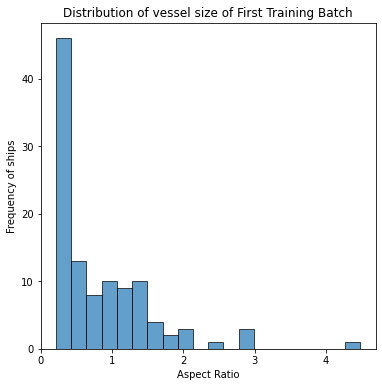

In [58]:
temp=distribution_of_aspect_ratio(os.path.normpath('SSDD/Training-Batch/labels/'), 416, 'First Training Batch')